 #importing stats from scipy

In [2]:
from scipy import stats   

### stats.norm.cdf(x,mean,standard deviation)

In [3]:
stats.norm.cdf(70,60,10) # x=70, mean(U)=60, std d=10

0.8413447460685429

In [4]:
#difference between 697 & 740
x=stats.norm.cdf(740,711,29)
y=stats.norm.cdf(697,711,29)
x-y

0.5267111786415019

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
beml=pd.read_csv("BEML.csv")
glaxo=pd.read_csv("GLAXO.csv")

In [7]:
beml.head()

Date    Open     High      Low    Last    Close  \
0  2010-01-04  1121.0  1151.00  1121.00  1134.0  1135.60   
1  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
3  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
4  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   

   Total Trade Quantity  Turnover (Lacs)  
0              101651.0          1157.18  
1               59504.0           676.47  
2              128908.0          1482.84  
3              117871.0          1352.98  
4              170063.0          1971.42

In [8]:
glaxo.head()

Date     Open     High      Low    Last    Close  \
0  2010-01-04  1613.00  1629.10  1602.00  1629.0  1625.65   
1  2010-01-05  1639.95  1639.95  1611.05  1620.0  1616.80   
2  2010-01-06  1618.00  1644.00  1617.00  1639.0  1638.50   
3  2010-01-07  1645.00  1654.00  1636.00  1648.0  1648.70   
4  2010-01-08  1650.00  1650.00  1626.55  1640.0  1639.80   

   Total Trade Quantity  Turnover (Lacs)  
0                9365.0           151.74  
1               38148.0           622.58  
2               36519.0           595.09  
3               12809.0           211.00  
4               28035.0           459.11

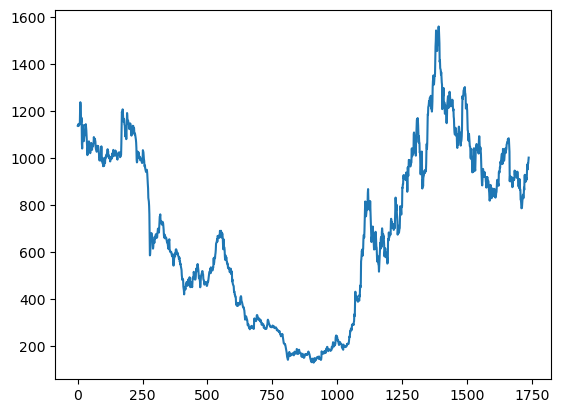

In [9]:
plt.plot(beml["Close"])              #gives 'close' data with x axis as index no

In [10]:
beml1=beml[["Date","Close"]]
glaxo1=glaxo[["Date","Close"]]

In [11]:
beml1

Date    Close
0     2010-01-04  1135.60
1     2010-01-05  1134.60
2     2010-01-06  1139.60
3     2010-01-07  1144.15
4     2010-01-08  1144.05
...          ...      ...
1734  2016-12-26   950.25
1735  2016-12-27   975.70
1736  2016-12-28   974.40
1737  2016-12-29   986.05
1738  2016-12-30  1000.60

[1739 rows x 2 columns]

In [12]:
beml1 = beml1.set_index(pd.DatetimeIndex(beml1["Date"]))

In [13]:
glaxo1 = glaxo1.set_index(pd.DatetimeIndex(glaxo1["Date"]))

Text(0.5, 1.0, 'GLAXO')

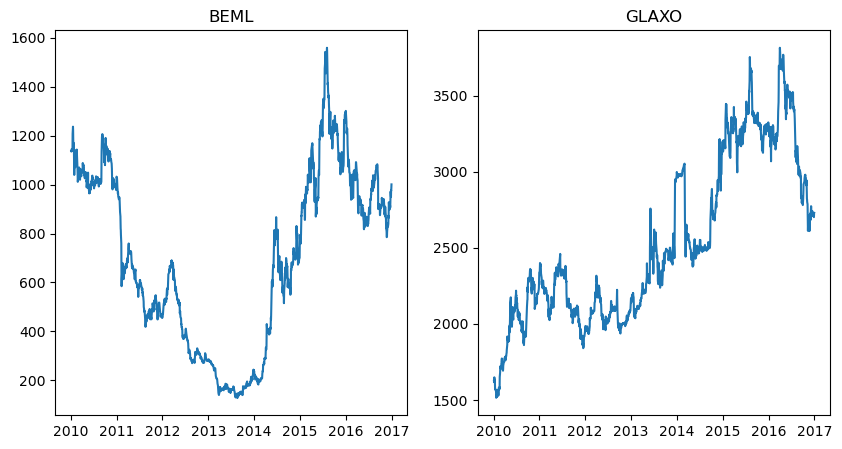

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(beml1["Close"])
plt.title("BEML")

plt.subplot(1,2,2)
plt.plot(glaxo1["Close"])  
plt.title("GLAXO")


In [15]:
glaxo1["gain"]=glaxo1["Close"].pct_change(periods=1)     

#added gain column by applying formula to close pct_change(periods=1)

In [16]:
glaxo1

Date    Close      gain
Date                                     
2010-01-04  2010-01-04  1625.65       NaN
2010-01-05  2010-01-05  1616.80 -0.005444
2010-01-06  2010-01-06  1638.50  0.013422
2010-01-07  2010-01-07  1648.70  0.006225
2010-01-08  2010-01-08  1639.80 -0.005398
...                ...      ...       ...
2016-12-26  2016-12-26  2723.50 -0.001283
2016-12-27  2016-12-27  2701.75 -0.007986
2016-12-28  2016-12-28  2702.15  0.000148
2016-12-29  2016-12-29  2727.90  0.009529
2016-12-30  2016-12-30  2729.80  0.000697

[1739 rows x 3 columns]

In [17]:
beml1["gain"]=beml1["Close"].pct_change(periods=1)

In [18]:
beml1

Date    Close      gain
Date                                     
2010-01-04  2010-01-04  1135.60       NaN
2010-01-05  2010-01-05  1134.60 -0.000881
2010-01-06  2010-01-06  1139.60  0.004407
2010-01-07  2010-01-07  1144.15  0.003993
2010-01-08  2010-01-08  1144.05 -0.000087
...                ...      ...       ...
2016-12-26  2016-12-26   950.25 -0.021924
2016-12-27  2016-12-27   975.70  0.026782
2016-12-28  2016-12-28   974.40 -0.001332
2016-12-29  2016-12-29   986.05  0.011956
2016-12-30  2016-12-30  1000.60  0.014756

[1739 rows x 3 columns]

In [19]:
glaxo1.dropna(inplace=True)
beml1.dropna(inplace=True)

Removed row containing NA values

In [20]:
glaxo1

Date    Close      gain
Date                                     
2010-01-05  2010-01-05  1616.80 -0.005444
2010-01-06  2010-01-06  1638.50  0.013422
2010-01-07  2010-01-07  1648.70  0.006225
2010-01-08  2010-01-08  1639.80 -0.005398
2010-01-11  2010-01-11  1629.45 -0.006312
...                ...      ...       ...
2016-12-26  2016-12-26  2723.50 -0.001283
2016-12-27  2016-12-27  2701.75 -0.007986
2016-12-28  2016-12-28  2702.15  0.000148
2016-12-29  2016-12-29  2727.90  0.009529
2016-12-30  2016-12-30  2729.80  0.000697

[1738 rows x 3 columns]

Text(0.5, 1.0, 'GLAXO')

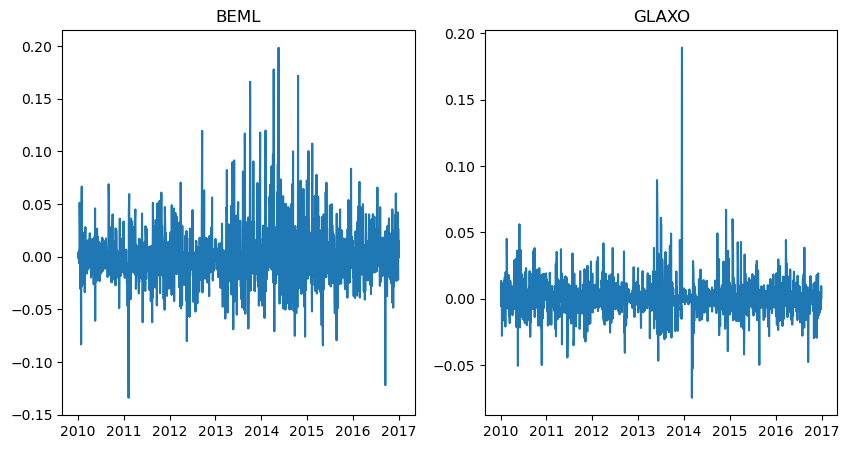

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(beml1["gain"])
plt.title("BEML")

plt.subplot(1,2,2)
plt.plot(glaxo1["gain"])  
plt.title("GLAXO")


Text(0.5, 1.0, 'GLAXO')

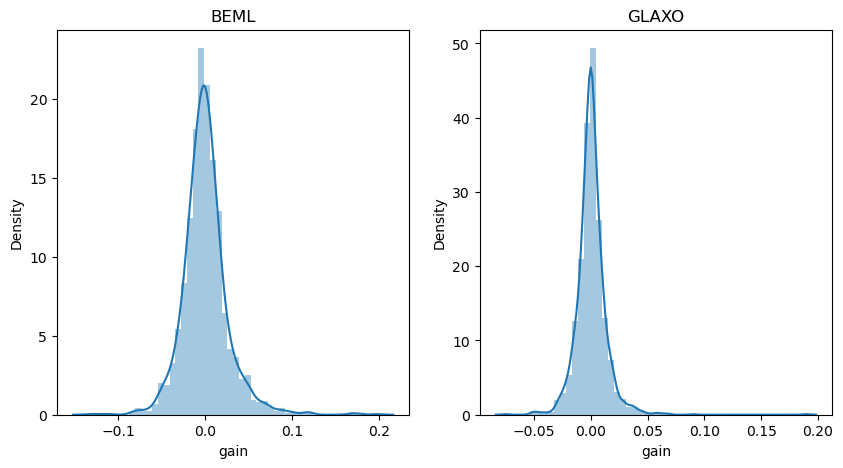

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(beml1["gain"])
plt.title("BEML")

plt.subplot(1,2,2)
sns.distplot(glaxo1["gain"])  
plt.title("GLAXO")

In [23]:
import numpy as np

### taking mean and std. deviation of gains of BEML & GLAXO Data set

In [24]:
beml_mean=beml1["gain"].mean()
beml_std=beml1["gain"].std()


glaxo_mean=glaxo1["gain"].mean()
glaxo_std=glaxo1["gain"].std()


### Normal Distribution given by - stats.norm.cdf (X,MEAN,STD)

In [25]:
stats.norm.cdf(-0.02,beml_mean,beml_std)

0.22155987503755287

In [26]:
stats.norm.cdf(0.02,beml_mean,beml_std)

0.7723017051592465

In [27]:
1-stats.norm.cdf(0.02,beml_mean,beml_std)

0.22769829484075355

In [28]:
stats.norm.ppf(0.975)

1.959963984540054

In [29]:
np.round(stats.norm.ppf(0.975),2)   #Z score for 95% confidence interval

1.96

### Confidence Interval 
stats.norm.interval(% of confidence, mean, std deviation)

In [30]:
beml_ci = stats.norm.interval(0.90,beml_mean,beml_std)


In [31]:
glaxo_ci = stats.norm.interval(0.90,glaxo_mean,glaxo_std)
np.round(glaxo_ci,4)

array([-0.0216,  0.0224])

### t statistics

In [35]:
stats.t.ppf(0.975,1738)  # (95% , degree of freedom=rows-1)
np.round(beml_ci,4)

array([-0.0432,  0.0437])

In [33]:
glaxoci=stats.t.interval(0.90,1737,glaxo_mean,glaxo_std)
np.round(glaxoci,4)

array([-0.0216,  0.0224])

### above 30 degree of freedom Normal dis.(Z) and (t) remain same

In [34]:
bemlci = stats.t.interval(0.90,1738,beml_mean,beml_std)
np.round(bemlci,4)

array([-0.0432,  0.0438])